In [38]:
subscription_key = 'f84fbdaff13f42aabc1bc88ed7b2a2d9'
assert subscription_key

vision_base_url = 'https://uksouth.api.cognitive.microsoft.com/'
analyze_url = vision_base_url + 'vision/v1.0/analyze'

In [39]:
import requests
params_analyze = {
    'visualFeatures': 'Categories,Tags,Faces,Description,Color'
    }

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patches
from io import BytesIO

In [41]:
def local_image(image_locn, type):
    if type == "local":
        image_data = open(image_locn, "rb").read()
        headers = {'Ocp-Apim-Subscription-key': subscription_key, 
                   'Content-Type': 'application/octet-stream'}
        response = requests.post(analyze_url, headers=headers, params=params_analyze, data=image_data)
    else:
        headers = {'Ocp-Apim-Subscription-key': subscription_key }
        response = requests.post(analyze_url, headers=headers, params=params_analyze, json={"url": image_locn})

    vision = response.json()
        
    if type == "local":
        image_file = image_locn
    else:
        image_file = BytesIO(requests.get(image_locn).content)    

    image = Image.open(image_file)
    
    plt.figure(figsize=(8,8))
    ax=plt.imshow(image, alpha=0.6)

    ds = vision["description"]["captions"][0]["text"].capitalize()
    plt.axis("off")
    _ = plt.title(ds, size="x-large", y=-0.1)
    
    for person in vision["faces"]:
        fr = person["faceRectangle"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s, %d"%(person["gender"].capitalize(), person["age"]), fontsize=20, weight="bold", va = "bottom")


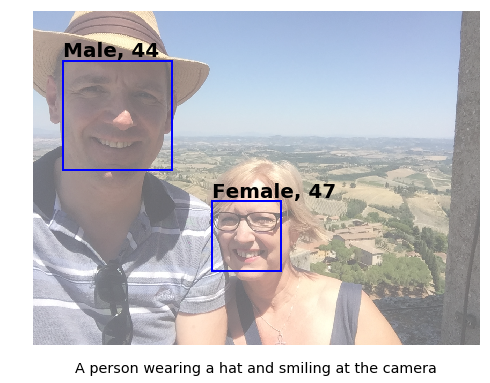

In [42]:
local_image("Images/TestImage001.jpg", "local")

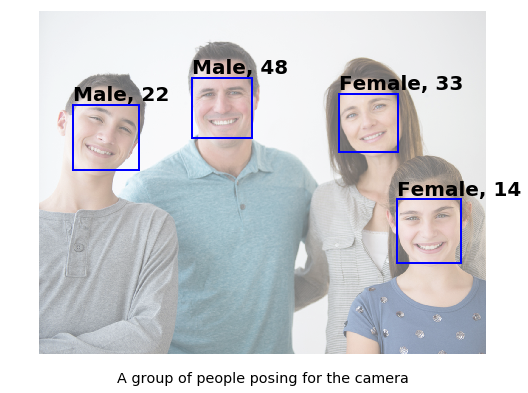

In [43]:
local_image("https://how-old.net/Images/faces2/main001.jpg", "web")